### Demo on TextBlob packages:

In [1]:
import nltk
from textblob import TextBlob
# since TextBlob is built on nltk, we need to download the required data from nltk for this package:
# python -m textblob.download_corpora

In [2]:
text = TextBlob("I hate vegetables so much!")
#access the attribute of each word
text.tags

[('I', 'PRP'),
 ('hate', 'VBP'),
 ('vegetables', 'NNS'),
 ('so', 'RB'),
 ('much', 'RB')]

In [3]:
text.words

WordList(['I', 'hate', 'vegetables', 'so', 'much'])

In [4]:
# get the sentiment polarity and subjectivity from the text:
text.sentiment

Sentiment(polarity=-0.275, subjectivity=0.55)

In [5]:
# control test on a neutral, objective sentence:
text2 = TextBlob("Mars is a red planet that has water")
text2.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

It seems like TextBlob can correctly identify the polarity and subjectivity of the above 2 samples. Let's proceed to our sentiment analysis on cryptocurrency tweets. In this analysis, I want to examine the twitter sentiment on the most popular cryptocurrencies in the last month. The top 10 cryptocurrencies were evaluated and ranked based on coinmarketcap.com as of 2/11/2018.

### Twitter sentiment analysis:

In [6]:
import tweepy
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [7]:
# retrive keys and tokens from twitter api
consumer_key = "ENTER_COMSUMER_KEY"
consumer_secret = "ENTER_COMSUMER_SECRET"
access_token = "ENTER_ACCESS_TOKEN"
access_tokent_secret = "ENTER_TOKENT_SECRET"

In [8]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_tokent_secret)
api = tweepy.API(auth)

In [9]:
# using search method for keyword bitcoin:
public_tweets = api.search("bitcoin")

In [10]:
for tweet in public_tweets:
    print(tweet.text)
    analysis = TextBlob(tweet.text)
    print(analysis.sentiment)

RT @IO_Coin: This Tuesday Feb 13th, 2018 we are releasing I/O Coin DIONS API V.1 along with updated Wallets. This will be a new beginning f…
Sentiment(polarity=0.06818181818181818, subjectivity=0.22727272727272727)
RT @TheBlueMatt: @cryptograffiti @La__Cuen Yay, you found New Zatoshi. Now don't believe every idiot wandering in and claiming to be the cr…
Sentiment(polarity=-0.33181818181818185, subjectivity=0.6272727272727273)
RT @btc_green: Did you know that #Bitcoin uses more energy than all of the orange countries? We need to build a sustainable future for #cry…
Sentiment(polarity=0.25, subjectivity=0.3125)
RT @wheelswordsmith: while she never actually wrote it into the books jk rowling has confirmed that draco malfoy was a libertarian vape ent…
Sentiment(polarity=0.2, subjectivity=0.55)


In [11]:
# Prepare the parameters:
# List of top 10 crytocurrencies as of Feb, 2018:
coin_names = ['Bitcoin', 'Ethereum', 'Ripple', 'Bitcoin Cash', 
              'Cardano', 'Litecoin', 'Stellar', 'NEO','EOS', 'IOTA']
# hashtag related to the coin
hashtag = "cryptocurrency"
# time interval is set to 30 most recent days:
since_date = (datetime.now() - timedelta(days=30)).strftime ("%Y-%m-%d")
until_date = datetime.now().strftime ("%Y-%m-%d")

In [12]:
# retrieve tweets and store in a dictionary:
all_polarities = dict()
for coin in coin_names:
    this_coin_polarities = []
    this_coin_tweets = api.search(q= [hashtag, coin], count = 100, since = since_date, until = until_date)
    for tweet in this_coin_tweets:
        analysis = TextBlob(tweet.text)
        #Get the label corresponding to the sentiment analysis
        this_coin_polarities.append(analysis.sentiment[0])
    #Save the mean for final results
    all_polarities[coin] = np.mean(this_coin_polarities)

In [13]:
# create a function that concludes the polarity of analysis:
def get_polarity(x, neutral = 0):
    if x > neutral:
        return "Positive"
    elif x == 0:
        return "Neutral"
    else:
        return "Negative"

In [14]:
# summarize the result using pandas dataframe:
summary = pd.DataFrame(list(all_polarities.items()), columns=['Crypto Currency', 'Polarity'])
summary['Sentiment'] = summary.Polarity.apply(get_polarity)
summary

,Crypto Currency,Polarity,Sentiment
0,Bitcoin,0.137041,Positive
1,Ethereum,0.142488,Positive
2,Ripple,0.098942,Positive
3,Bitcoin Cash,0.157614,Positive
4,Cardano,0.071194,Positive
5,Litecoin,0.158046,Positive
6,Stellar,0.332979,Positive
7,NEO,0.245851,Positive
8,EOS,0.365854,Positive
9,IOTA,0.229374,Positive


In [15]:
# sort the dictionary based on values using operator
import operator
all_polarities = dict(sorted(all_polarities.items(), key=operator.itemgetter(1),reverse=True))

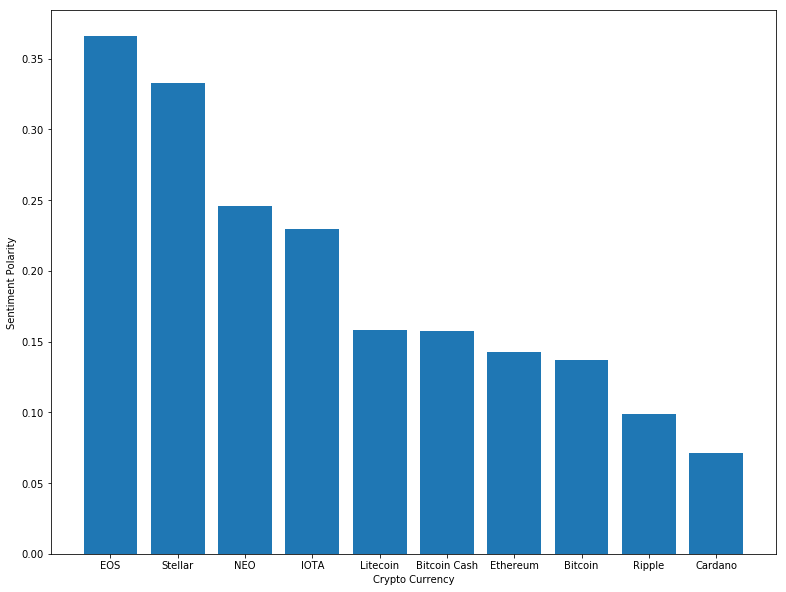

In [16]:
# visualize the data
plt.figure(figsize=(13,10))
plt.bar(range(len(all_polarities)), list(all_polarities.values()), align = 'center')
plt.xticks(range(len(all_polarities)), list(all_polarities.keys()))
plt.xlabel("Crypto Currency")
plt.ylabel("Sentiment Polarity")
plt.show()